# De wetenschap achter het winnen van een tenniswedstrijd

Studenten: Robin Flier, Casper Smeets, Sjoerd Takken, Jip Voshol

Team nummer: G3

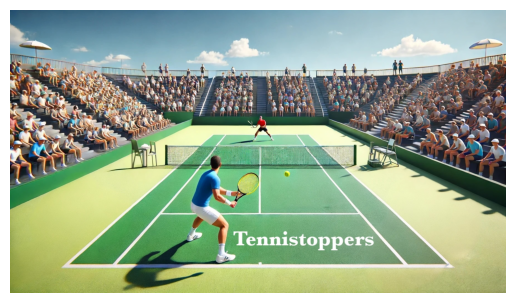

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

# Voer het pad naar je afbeelding in
image_path = '../images/tennisveld.jpg'

# Open de afbeelding met Pillow
image = Image.open(image_path)

# Gebruik matplotlib om de afbeelding te tonen
plt.imshow(image)
plt.axis('off')  # Verberg de assen
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random


# Load the dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')


# Set the style for seaborn
sns.set(style="whitegrid")


## Introductie

In de wereld van tennis wordt succes vaak afgemeten aan overwinningen en prestaties op het veld, zoals recentelijk benadrukt door Novak Djokovic, die Roland Garros won en daarmee de titel van succesvolste tennisser aller tijden op zijn naam schreef (NOS, 2023). Deze prestatie onderstreept dat de weg naar een overwinning een complexe mix is van zowel aangeboren als aangeleerde eigenschappen. Tennis, een sport die zowel fysieke bekwaamheid als mentale weerbaarheid vereist, biedt een rijke dataset om te onderzoeken welke factoren de uitkomsten van wedstrijden beïnvloeden. Dit project verdeelt deze factoren in twee categorieën: aangeboren eigenschappen en aangeleerde vaardigheden.

Aangeboren eigenschappen omvatten kenmerken zoals afkomst, leeftijd, speelhand en lichaamslengte. Deze factoren zijn inherent aan de speler en niet beïnvloedbaar door training of ervaring. Hoewel deze eigenschappen op het eerste gezicht misschien een vaste rol spelen, zullen we onderzoeken in hoeverre ze de prestaties op het veld echt beïnvloeden.

Aan de andere kant staan de aangeleerde eigenschappen: vaardigheden en tactieken die spelers kunnen ontwikkelen door training en wedstrijdervaring. Hier kijken we naar aspecten zoals het aantal aces, de tijdsduur van de wedstrijd en het aantal dubbele fouten. Deze elementen zijn cruciaal omdat ze directe indicatoren zijn van zowel technische bekwaamheid als mentale scherpte tijdens de wedstrijd.

Onze analyse zal deze variabelen zowel afzonderlijk als in combinatie bestuderen om te bepalen welke het meest bepalend zijn voor succes in tenniswedstrijden. We zullen ook de verschillen tussen mannen en vrouwen in deze aspecten verkennen, om eventuele unieke strategieën of trends in speelstijlen te identificeren die kunnen verschillen per geslacht.

<strong>Opmerking</strong>

<i>In enkele plots wordt gesproken van winstpercentage. Hiermee wordt bedoeld dat een wedstrijd die door iemand is gespeeld met deze eigenschap (e.g. slagarm, afkomst) in dat percentage door die persoon is gewonnen. Bijvoorbeeld in de eerste plot is te zien dat een vrouw van 170-175 50% van haar wedstrijden heeft gewonnen.</i>

## Dataset en Preprocessing

<strong>De code verwerkt twee verschillende tennis datasets (ATP voor mannen en WTA voor vrouwen), combineert ze en slaat de gecombineerde dataset op</strong>. 

<i>De stappen zijn als volgt</i>: 

1. <b>Datasets laden</b>: De ATP- en WTA-datasets worden ingeladen vanuit CSV-bestanden. 

2. <b>Preprocessingsfunctie definiëren</b>: 
- Kolommen verwijderen: Bepaalde (belangrijke) kolommen die voor een erg groot deel ontbreken, worden verwijderd. 
- Datum conversie: De kolom 'tourney_date' wordt omgezet naar een datetime-formaat.
 - Verwijderen van rijen met ontbrekende waarden: Rijen met ontbrekende waarden in de kolommen 'winner_age', 'loser_age', 'winner_ht' of 'loser_ht' worden verwijderd.
 - Leeftijdskolommen omzetten: De 'winner_age' en 'loser_age' kolommen worden omgezet naar numerieke waarden, waarbij eventuele komma's worden vervangen door punten. 
- Geslachtskolom toevoegen: Een nieuwe kolom 'gender' wordt toegevoegd aan de dataset zodat de twee datasets kunnen worden gecombineerd, maar tegelijkertijd de onderscheid tussen man/vrouw gemaakt kan worden.

3. <b>Functie toepassen</b>: De preprocessingsfunctie wordt toegepast op zowel de ATP- als de WTA-dataset. Daarnaast bestond de WTA dataset alleen uit wedstrijden uit 2022, terwijl de ATP meerdere jaren bevatte. We hebben ervoor gekozen die dataset ook te beperken tot het jaar 2022. Verder waren de datasets wat betreft de kolommen zeer gelijk, dus geschikt om te combineren.

4. <b>Datasets combineren</b>: De schoongemaakte ATP- en WTA-datasets worden gecombineerd tot één dataset.

5. <b>Gecombineerde dataset opslaan</b>: De gecombineerde dataset wordt opgeslagen in een nieuw CSV-bestand.


## Data story: tenniswedstrijden winnen

### Eerste perspectief: Lichamelijke kenmerken

Het eerste perspectief geeft inzicht in de relatie tussen lichamelijke kenmerken van sporters en hun winkansen. Tennis is een sport die niet alleen techniek en tactiek vereist, maar de fysieke gesteldheid van een speler speelt ook een aanzienlijke rol. We zullen kijken naar lichamelijke kenmerken binnen deze fysieke gesteldheid zoals de lengte van de speler, de voorkeurshand, afkomst en leeftijd. Deze variabelen zullen vervolgens vergeleken worden met de wedstrijdresultaten om te kijken wat de optimale lichamelijke waardes zijn voor het winnen van een wedstrijd.

Uitkomsten van de data hebben een relevantie om specifieke spelers te scouten die aan de meest optimale eisen voldoen. De kans om deze speler uit te laten groeien tot prof is dan een stuk groter.

#### Argument 1: Lengte

De lengte van een speler is een variabele die vaak onderzocht wordt. Lengte kan namelijk verschillende voordelen bieden zoals een betere bereikbaarheid van ballen en een hogere snelheid bij services. Langere mensen hebben zo bijvoorbeeld ook een grotere kracht bij het slaan van een bal. Kortere mensen kunnen echter ook een voordeel hebben door de wendbaarheid die handig kan zijn bij onverwachtse ballen. Uitkomsten van dit verband kunnen inzicht geven in welke lengte optimaal is voor het winnen van een wedstrijd.

In [8]:
import pandas as pd
import plotly.graph_objects as go

# Laad de dataset
file_path = '../combined_cleaned_tennis_data.csv'
df = pd.read_csv(file_path)

# Controleer op ontbrekende waarden in de kolommen 'winner_ht' en 'loser_ht'
df = df.dropna(subset=['winner_ht', 'loser_ht'])

# Combineer de lengtekolommen voor winnaars en verliezers en voeg een kolom voor geslacht en resultaat toe
winner_heights = df[['winner_ht', 'gender']].rename(columns={'winner_ht': 'height'})
winner_heights['result'] = 'win'

loser_heights = df[['loser_ht', 'gender']].rename(columns={'loser_ht': 'height'})
loser_heights['result'] = 'loss'

# Combineer de twee dataframes
heights_df = pd.concat([winner_heights, loser_heights])

# Definieer lengtegroepen
height_bins = range(150, 210, 5)  # Van 150cm tot 210cm met stappen van 5cm
heights_df['height_group'] = pd.cut(heights_df['height'], bins=height_bins)

# Bereken de winstpercentages per lengtegroep en geslacht
win_loss_counts = heights_df.groupby(['height_group', 'gender', 'result'], observed=True).size().unstack(fill_value=0)
win_loss_counts['total'] = win_loss_counts['win'] + win_loss_counts['loss']
win_loss_counts['win_percentage'] = win_loss_counts['win'] / win_loss_counts['total'] * 100

# Bereken de dichtheden per lengtegroep en geslacht
density_counts = heights_df.groupby(['height_group', 'gender'], observed=True).size().unstack(fill_value=0)
density_counts = density_counts.div(density_counts.sum(axis=1), axis=0)

# Reset index en converteer height_group naar string
win_loss_counts = win_loss_counts.reset_index()
win_loss_counts['height_group'] = win_loss_counts['height_group'].astype(str)
density_counts = density_counts.reset_index()
density_counts['height_group'] = density_counts['height_group'].astype(str)

# Interactieve plot met Plotly
fig = go.Figure()

# Voeg de dichtheidsplot toe
for gender, color, fill_color, gender_nl in [('Men', 'blue', 'rgba(0, 0, 255, 0.3)', 'Mannen Dichtheid'), ('Women', 'pink', 'rgba(255, 182, 193, 0.3)', 'Vrouwen Dichtheid')]:
    gender_data = density_counts[['height_group', gender]]
    fig.add_trace(go.Scatter(
        x=gender_data['height_group'], 
        y=gender_data[gender], 
        mode='lines', 
        line=dict(color=color, width=0), 
        fill='tozeroy',
        fillcolor=fill_color, 
        name=gender_nl
    ))

# Lijnplot voor winstpercentages met opvulling
for gender, color, fill_color, win_nl in [('Men', 'blue', 'rgba(0, 0, 255, 0.3)', 'Mannen Winst %'), ('Women', 'pink', 'rgba(255, 182, 193, 0.3)', 'Vrouwen Winst %')]:
    gender_data = win_loss_counts[win_loss_counts['gender'] == gender]
    fig.add_trace(go.Scatter(
        x=gender_data['height_group'], 
        y=gender_data['win_percentage'], 
        mode='lines+markers', 
        line=dict(dash='dash', color=color), 
        marker=dict(color=color), 
        fill='tozeroy',
        fillcolor=fill_color,
        name=win_nl
    ))

# Stijl en layout
fig.update_layout(
    title='Distributie van Lengte en Winstpercentage per Lengtegroep en Geslacht',
    xaxis_title='Lengte (cm)',
    yaxis_title='Dichtheid / Winstpercentage (%)',
    yaxis=dict(range=[30, 60],showgrid=True, gridcolor='darkolivegreen', # Kleur van het rooster op de y-as
        zerolinecolor='darkolivegreen'),
    xaxis=dict(tickangle=-45,showgrid=True, gridcolor='darkolivegreen', # Kleur van het rooster op de y-as
        zerolinecolor='darkolivegreen'),
    legend_title='Geslacht',
    template='simple_white',
    width=1000,  # Verhoogde breedte van de plot
    height=600,
    paper_bgcolor='honeydew',  # Achtergrondkleur van het papier
    plot_bgcolor='honeydew',
)

fig.show()

Figuur 1:

In de figuur zien we bij de mannen een duidelijke piek in het winstpercentage rond de lengtegroepen van 165-170 cm en 190-195 cm. Voor vrouwen blijft het winstpercentage relatief stabiel, met lichte schommelingen tussen 155-160 cm en 175-180 cm. In de kleinste en grootste lengtegroepen daalt het winstpercentage bij beide geslachten. Specifieke lengtes bieden fysieke voordelen zoals een groter bereik en betere service, wat bijdraagt aan hogere winstpercentages. Verschillende lengtes maken ook uiteenlopende speelstijlen en tactieken mogelijk, wat invloed heeft op succes op de baan. Bovendien kunnen spelers in bepaalde lengtegroepen betere toegang hebben tot training en ondersteuning, of vaker doorbreken naar professioneel niveau.

#### Argument 2: Afkomst

In [10]:
import pandas as pd
import plotly.graph_objects as go

# Data laden
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Filter wedstrijden tussen verschillende nationaliteiten
df = df[df['winner_ioc'] != df['loser_ioc']]

# Overwinningen per geslacht en land filteren
wins_per_country_gender = df.groupby(['winner_ioc', 'gender']).size().unstack(fill_value=0)

# Top 10 landen met de meeste overwinningen selecteren
top_countries = wins_per_country_gender.sum(axis=1).nlargest(10).index
top_wins_per_country_gender = wins_per_country_gender.loc[top_countries]

# 'Overig' toevoegen voor de overige landen
other_wins_per_country_gender = wins_per_country_gender.loc[~wins_per_country_gender.index.isin(top_countries)].sum()
top_wins_per_country_gender.loc['Other'] = other_wins_per_country_gender

# Kleurenpaletten
cmap = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#CFCFCF']

# Data voor mannen en vrouwen
men_values = top_wins_per_country_gender['Men']
women_values = top_wins_per_country_gender['Women']
labels = top_wins_per_country_gender.index

# Buitenste ring (mannen)
fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=men_values, name="Mannen",
                     marker=dict(colors=cmap, line=dict(color='blue', width=3)),
                     hole=0.8, hoverinfo="label+percent+name", textinfo='percent', domain={'x': [0, 1], 'y': [0, 1]}))

# Binnenste ring (vrouwen)
fig.add_trace(go.Pie(labels=labels, values=women_values, name="Vrouwen",
                     marker=dict(colors=cmap, line=dict(color='pink', width=3)),
                     hole=0.7, hoverinfo="label+percent+name", textinfo='percent', domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]}))


fig.update_layout(
    title_text="Percentage winst per land",
    title_font_size=20,  # Normale titelgrootte
    showlegend=True,
    annotations=[
        dict(text='Mannen', x=0.5, y=0.48, font_size=14, showarrow=False, font_color='blue'),
        dict(text='Vrouwen', x=0.5, y=0.52, font_size=14, showarrow=False, font_color='pink')
    ],
    width=700, 
    height=600,
    paper_bgcolor='honeydew',  # Achtergrondkleur van het papier
    plot_bgcolor='honeydew'
)

fig.show()



Figuur 2:

De buitenste ring toont het percentage gewonnen wedstrijden per land voor mannen, terwijl de binnenste ring hetzelfde weergeeft voor vrouwen, exclusief nationale wedstrijden. Bij de mannen domineren de VS (12,0%) en Spanje (10,3%), terwijl bij de vrouwen de VS (12,7%) en Spanje (8,51%) ook prominent aanwezig zijn. De "Overig/Other" categorie is groot in beide ringen, wat duidt op een brede spreiding van overwinningen over vele landen.


We zien een dominantie van de VS en Spanje: Deze landen hebben waarschijnlijk een sterke tenniscultuur en betere trainingsfaciliteiten. Dan de grote "Overig" segmenten: Dit wijst op de globalisering van tennis, waar talent uit vele verschillende landen komt. Wat betreft d geslachtsverschillen: De spreiding en percentages zijn vergelijkbaar, maar de specifieke bijdragen variëren, wat kan wijzen op verschillen in de dominantie van bepaalde landen in mannen- versus vrouwentennis.

In [59]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

correct_codes = {
    'NED': 'NLD',  # Nederland
    'GER': 'DEU',  # Duitsland
    'INA': 'IDN',  # Indonesië
    'RSA': 'ZAF',  # Zuid-Afrika
    'TPE': 'TWN',  # Taiwan
    'CRO': 'HRV',  # Kroatië
    'SLO': 'SVN',  # Slovenië
    'SUI': 'CHE',  # Zwitserland
    'POR': 'PRT',  # Portugal
    'GRE': 'GRC',  # Griekenland
    'BUL': 'BGR',  # Bulgarije
    'SLO': 'SVK',  # Slowakije (indien eerder foutief als Slovenië gelabeld)
}

# Vervang de landcodes in de dataset
df['winner_ioc'] = df['winner_ioc'].replace(correct_codes)
df['loser_ioc'] = df['loser_ioc'].replace(correct_codes)

# Calculate the number of wins per country
country_wins = df['winner_ioc'].value_counts()

# Calculate the total number of matches per country (winner and loser included)
total_matches_per_country = df['winner_ioc'].value_counts() + df['loser_ioc'].value_counts()

# Calculate normalized win percentages
normalized_wins = (country_wins / total_matches_per_country).dropna().reset_index()
normalized_wins.columns = ['Land', 'Genormaliseerd Winstpercentage']

# Convert normalized win percentages to percentage format and round to 2 decimal places for visualization
normalized_wins['Genormaliseerd Winstpercentage'] = (normalized_wins['Genormaliseerd Winstpercentage'] * 100).round(2)

# Create a choropleth map using Plotly
fig = px.choropleth(
    normalized_wins,
    locations="Land",
    locationmode="ISO-3",
    color="Genormaliseerd Winstpercentage",
    hover_name="Land",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Genormasiseerde Winstpercentage per Land"
)


fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        bgcolor='honeydew'
    ),
    coloraxis_colorbar=dict(
        title="Win %",
        x=5,  # Adjust the position of the color bar
        thickness=30,
    ),
    margin=dict(l=0, r=0, t=50, b=0),  # Adjust the margins for a larger map,
    paper_bgcolor='honeydew',  # Achtergrondkleur van het papier
    plot_bgcolor='honeydew',
)



#### Argument 3: Slagarm

In [67]:
import pandas as pd
import plotly.express as px

# Laad de dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Filter de data om alleen wedstrijden te pakken waar links tegen rechts speelt
filtered_data = df[(df['winner_hand'].isin(['R', 'L'])) & (df['loser_hand'].isin(['R', 'L']))]

# Bereken winstpercentages voor 'R' en 'L' met een splitsing op geslacht
win_counts = filtered_data.groupby(['winner_hand', 'gender']).size()
total_matches_winner = filtered_data.groupby(['winner_hand', 'gender']).size()
total_matches_loser = filtered_data.groupby(['loser_hand', 'gender']).size()

# Voeg de totale wedstrijden van winnaars en verliezers samen voor een nauwkeurige berekening
total_matches = total_matches_winner.add(total_matches_loser, fill_value=0)

# Creëer een DataFrame voor winstpercentages
win_percentage = (win_counts / total_matches * 100).reset_index(name='Winning Percentage')
win_percentage['Winning Percentage'] = win_percentage['Winning Percentage'].round(2)

# Interactieve barplot met Plotly
fig = px.bar(win_percentage, x='winner_hand', y='Winning Percentage', color='gender',
             title='Winstpercentage per Hand en Geslacht',
             labels={'winner_hand': 'Hand', 'Winning Percentage': 'Winstpercentage (%)'},
             color_discrete_map={'Men': 'blue', 'Women': 'pink'},
             barmode='group',  # Groepeer de balken
             category_orders={'winner_hand': ['R', 'L'], 'gender': ['Man', 'Vrouw']})

# Stijlen aanpassen voor betere leesbaarheid en smalle balken
fig.update_traces(width=0.3)  # Maak de balken smaller

fig.update_layout(
    font=dict(size=14),  # Grotere lettergrootte voor leesbaarheid
    bargap=0.3,  # Verminder de ruimte tussen de balken
    bargroupgap=0.1,  # Verminder de ruimte tussen de groepen balken
    width=700,  # Totale breedte van de plot aanpassen
    height=500,  # Totale hoogte van de plot aanpassen
    paper_bgcolor='honeydew',  # Achtergrondkleur van het papier
    plot_bgcolor='honeydew',
    yaxis=dict(
        gridcolor='darkolivegreen', # Kleur van het rooster op de y-as
        zerolinecolor='darkolivegreen'
    )
)
fig.show()


Figuur 3:

Bovenstaande figuur geeft het verschil weer tussen de winstkansen tussen linkshandige mannen/vrouwen vs. rechtshandige mannen/vrouwen. Uit de figuur blijkt dat zowel rechtshandige mannen als vrouwen vaker winnen in een onderling duel tussen een linkshandige tennisser en een rechtshandige tennisser, maar dat het geen significant voordeel oplevert. Over het algemeen is een groter deel van de populatie rechtshandig. Hier is dus ook meer data van beschikbaar. 

Wanneer de winstkansen van de linkshandigen en de rechtshandigen bij elkaar opgeteld worden, geeft dit niet altijd 100%. Dit komt doordat er een aantal wedstrijden gespeeld is die niet uitgespeeld zijn vanwege opgave. Hierbij is er geen duidelijke winnaar, maar wordt het in de dataset aangegeven als opgave.

#### Argument 4: Leeftijd

In [1]:
import pandas as pd
import plotly.express as px

# Laad de dataset
file_path = '../combined_cleaned_tennis_data.csv'
df = pd.read_csv(file_path)

# Update de leeftijdsgroepen: bins van 20 tot 40 jaar om de 2 jaar
age_bins = [0, 20] + list(range(22, 42, 2)) + [100]
age_labels = ['<20'] + [f'{i}-{i+1}' for i in range(20, 40, 2)] + ['40+']
df['winner_age_group'] = pd.cut(df['winner_age'], bins=age_bins, labels=age_labels, right=False)
df['loser_age_group'] = pd.cut(df['loser_age'], bins=age_bins, labels=age_labels, right=False)

# Bereken het aantal gewonnen en verloren wedstrijden per speler
winner_counts = df.groupby(['winner_name', 'gender', 'winner_age_group'], observed=False).size().reset_index(name='win_count')
loser_counts = df.groupby(['loser_name', 'gender', 'loser_age_group'], observed=False).size().reset_index(name='loss_count')

# Hernoem kolommen voor consistente merge
winner_counts = winner_counts.rename(columns={'winner_name': 'player_name', 'winner_age_group': 'age_group'})
loser_counts = loser_counts.rename(columns={'loser_name': 'player_name', 'loser_age_group': 'age_group'})

# Combineer winnaars en verliezers data
combined_counts = pd.merge(winner_counts, loser_counts, on=['player_name', 'gender', 'age_group'], how='outer')

# Vul ontbrekende waarden in specifieke kolommen in
combined_counts['win_count'] = combined_counts['win_count'].fillna(0)
combined_counts['loss_count'] = combined_counts['loss_count'].fillna(0)

combined_counts['total_matches'] = combined_counts['win_count'] + combined_counts['loss_count']
combined_counts['win_percentage'] = (combined_counts['win_count'] / combined_counts['total_matches']) * 100

# Bereken gemiddelde winpercentages per leeftijdsgroep en geslacht
avg_win_percentage = combined_counts.groupby(['age_group', 'gender'], observed=False).agg(
    total_matches=('total_matches', 'sum'),
    total_wins=('win_count', 'sum')
).reset_index()

avg_win_percentage['win_percentage'] = (avg_win_percentage['total_wins'] / avg_win_percentage['total_matches']) * 100
avg_win_percentage['win_percentage'] = avg_win_percentage['win_percentage'].round(2)

# Interactieve barplot met Plotly
fig = px.bar(avg_win_percentage, x='age_group', y='win_percentage', color='gender',
             title='Gemiddeld Win Percentage per Leeftijdsgroep en Geslacht',
             labels={'age_group': 'Leeftijdsgroep', 'win_percentage': 'Gemiddeld Win Percentage (%)'},
             color_discrete_map={'Men': 'blue', 'Women': 'pink'},
             barmode='group',  # Groepeer de balken
             category_orders={'age_group': age_labels, 'gender': ['Men', 'Women']})

# Stijlen aanpassen voor betere leesbaarheid en smalle balken
fig.update_traces(width=0.3)  # Maak de balken smaller

fig.update_layout(
    font=dict(size=14),  # Grotere lettergrootte voor leesbaarheid
    bargap=0.3,  # Verminder de ruimte tussen de balken
    bargroupgap=0.1,  # Verminder de ruimte tussen de groepen balken
    width=800,  # Totale breedte van de plot aanpassen
    height=500,  # Totale hoogte van de plot aanpassen
    paper_bgcolor='honeydew',  # Achtergrondkleur van het papier
    plot_bgcolor='honeydew',
    yaxis=dict(
        gridcolor='darkolivegreen', # Kleur van het rooster op de y-as
        zerolinecolor='darkolivegreen'
    )
)

fig.show()


Figuur 4:

De leeftijd van een topsporter speelt vaak een grote rol bij de resultate die deze topsporter behaald. In deze figuur kunnen we zien dat leeftijd voor de vrouwen weinig invloed lijkt te hebben op de winstkansen, met uitzondering van de categorie 40+. Dit kan erop wijzen dat vrouwen gedurende hun carriere een relatief constante vorm kunnen behouden. Voor de mannen is dat anders. De winstkans neemt relatief gezien af per leeftijdsgroep, behalve voor de groep 34-35. Een verklaring hiervoor kan zijn dat in deze groep een aantal toppers, zoals Djokovic, Federer, Nadal en Murray in dit jaar nog erg competatief waren ondanks hun leeftijd. Verder zien we een piek voor de leeftijdsgroep <20. Dit zou gedeeltelijk te verklaren zijn door de dominantie van een jonge nieuwkomer in dat jaar: Carlos Alcaraz. Omdat er verder niet veel tieners speelden, wegen zijn wedstrijden zwaar in de leeftijdsgroep.

### Tweede perspectief: Trainbare eigenschappen

Bij het tweede perspectief richten we ons op de winkansen van tennisspelers door een analyse van kenmerken die door training beïnvloed kunnen worden. Het doel is om te identificeren welke trainbare variabelen een significante invloed hebben op de uitkomst van wedstrijden. We focussen ons op statistieken zoals aantal aces, aantal dubbele fouten, en het aantal breakpunten dat gered wordt. Deze variabelen zijn essentieel omdat ze direct gerelateerd zijn aan de vaardigheden en voorbereiding van de spelers.

We gaan deze gegevens gebruiken om te ontdekken welke trainingselementen het verschil maken in wedstrijden. Dit is niet alleen handig voor coaches en spelers om hun trainingen beter te plannen, maar geeft ons ook meer inzicht in hoe bepaalde oefeningen bijdragen aan succes op de baan. Uiteindelijk kan dit onderzoek leiden tot slimmere trainingsplannen die spelers helpen beter te presteren en vaker te winnen.

#### Argument 1: Aantal aces en dubbele fouten

Het is belangrijk om te weten welke trainbare facetten bevorderend zijn voor het winnen van een tenniswedstrijd. Dit kan ervoor zorgen dat er op specifieke dingen getraind kan worden om te verbeteren.

In [37]:
# Aannemende dat 'fig_winnaars' en 'fig_verliezers' de figuren zijn die je hebt gemaakt.
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objs as go

data = pd.read_csv('../combined_cleaned_tennis_data.csv')

grouped_winnaars = data.groupby(['w_ace', 'w_df']).size().reset_index(name='frequency')
grouped_verliezers = data.groupby(['l_ace', 'l_df']).size().reset_index(name='frequency')

# Vaste grootte voor alle bubbels
fixed_size = 10

# Filter data voor trendlijn op basis van frequentie groter dan 15
filtered_winnaars = grouped_winnaars[grouped_winnaars['frequency'] > 15]
filtered_verliezers = grouped_verliezers[grouped_verliezers['frequency'] > 15]

# Handmatig berekenen van de trendlijn
def calculate_slope_through_origin(data, x, y):
    # Bereken de termen nodig voor de numerieke methode
    xy = data[x] * data[y]
    xx = data[x] ** 2
    
    # Bereken de helling (b1) waarbij b0 = 0 (trendlijn gaat door de oorsprong)
    b1 = xy.sum() / xx.sum()
    
    return b1

# Bereken de hellingen
b1_win = calculate_slope_through_origin(filtered_winnaars, 'w_ace', 'w_df')
b1_ver = calculate_slope_through_origin(filtered_verliezers, 'l_ace', 'l_df')

# X-waarden voor trendlijn
x_range = np.linspace(0, 40, 100)

# Y-waarden voor trendlijn, beginnend bij de oorsprong
y_winnaars = b1_win * x_range
y_verliezers = b1_ver * x_range

fig_winnaars = px.scatter(grouped_winnaars,
                          x='w_ace',
                          y='w_df',
                          size=np.full(len(grouped_winnaars), fixed_size),
                          color='frequency',
                          hover_data={'frequency': True, 'w_ace': True, 'w_df': True},
                          title='Bubble Plot Aces vs. Dubbele Fouten (Winnaars)',
                          labels={'w_ace': 'Aantal Aces', 'w_df': 'Aantal Dubbele Fouten', 'frequency': 'Frequentie'},
                          size_max=fixed_size,
                          opacity=0.8,
                          color_continuous_scale='Turbo')

# Voeg trendlijn toe
fig_winnaars.add_trace(go.Scatter(x=x_range, y=y_winnaars, mode='lines', name='Trendlijn', line=dict(color='red'), hoverinfo='all', hovertemplate='Aces: %{x:.0f}<br>Dubbele fouten: %{y:.0f}<extra></extra>'
))

fig_winnaars.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_winnaars.update_layout(plot_bgcolor='honeydew',
                             paper_bgcolor='honeydew',
                             xaxis=dict(title='Aantal Aces', range=[-1, 41], gridcolor='darkolivegreen', zerolinecolor='darkolivegreen'),
                             yaxis=dict(title='Aantal Dubbele Fouten', range=[-1, 21], gridcolor='darkolivegreen', zerolinecolor='darkolivegreen'),
                             margin=dict(l=20, r=20, t=100, b=20),
                    )

fig_verliezers = px.scatter(grouped_verliezers,
                            x='l_ace',
                            y='l_df',
                            size=np.full(len(grouped_verliezers), fixed_size),
                            color='frequency',
                            hover_data={'frequency': True, 'l_ace': True, 'l_df': True},
                            title='Bubble Plot Aces vs. Dubbele Fouten (Verliezers)',
                            labels={'l_ace': 'Aantal Aces', 'l_df': 'Aantal Dubbele Fouten', 'frequency': 'Frequentie'},
                            size_max=fixed_size,
                            opacity=0.8,
                            color_continuous_scale='Turbo')

# Voeg trendlijn toe
fig_verliezers.add_trace(go.Scatter(x=x_range, y=y_verliezers, mode='lines', name='Trendlijn', line=dict(color='red'), hoverinfo='all', hovertemplate='Aces: %{x:.0f}<br>Dubbele fouten: %{y:.0f}<extra></extra>'))

fig_verliezers.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_verliezers.update_layout(plot_bgcolor='honeydew',
                             paper_bgcolor='honeydew',
                             xaxis=dict(title='Aantal Aces', range=[-1, 41], gridcolor='darkolivegreen', zerolinecolor='darkolivegreen'),
                             yaxis=dict(title='Aantal Dubbele Fouten', range=[-1, 21], gridcolor='darkolivegreen', zerolinecolor='darkolivegreen'),
                             margin=dict(l=20, r=20, t=100, b=20),
                    )
# Voeg de trendlijn van winnaars toe aan de grafiek van verliezers
fig_verliezers.add_trace(
    go.Scatter(
        x=x_range, 
        y=y_winnaars, 
        mode='lines', 
        name='Trendlijn Winnaars',
        line=dict(color='grey', dash='dash'),  # Grijze stippellijn voor onderscheid
        hoverinfo='none'
    )
)

# Voeg de trendlijn van verliezers toe aan de grafiek van winnaars
fig_winnaars.add_trace(
    go.Scatter(
        x=x_range, 
        y=y_verliezers, 
        mode='lines', 
        name='Trendlijn Verliezers',
        line=dict(color='grey', dash='dash'),  # Grijze stippellijn voor onderscheid
        hoverinfo='none'
    )
)

# Optioneel, update de layout om de legenda beter te plaatsen als deze te druk wordt
fig_winnaars.update_layout(legend=dict(orientation="h", x=0, y=1.1))
fig_verliezers.update_layout(legend=dict(orientation="h", x=0, y=1.1))

# Toon de bijgewerkte plots
fig_winnaars.show()
fig_verliezers.show()

Figuur 5: 

Het is erg interessant om te kijken naar de relatie tussen het aantal geslagen aces en het aantal dubbele fouten. 
Het proberen te slaan van een ace is namelijk erg risicovol en zal kunnen leiden tot het maken van een foute opslag. Uit de figuur valt op te maken dat er wel degelijk een relatie is tussen beide. Zo is er te zien dat een laag aantal aces, dus weinig risico,
in heel veel gevallen ook leidt tot een laag aantal dubbele fouten. De meest voorkomende combinaties zijn dan ook: 1 ace, 2 dubbele fouten (121 keer) en 1 ace, 1 dubbele fout (116 keer).

#### Argument 2: Aantal breakpoints gewonnen

In [15]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

# Laad het CSV-bestand
file_path = '../combined_cleaned_tennis_data.csv'
tennis_data = pd.read_csv(file_path)

# Converteer de relevante kolommen naar numeriek
tennis_data['w_bpSaved'] = pd.to_numeric(tennis_data['w_bpSaved'], errors='coerce')
tennis_data['w_bpFaced'] = pd.to_numeric(tennis_data['w_bpFaced'], errors='coerce')
tennis_data['l_bpSaved'] = pd.to_numeric(tennis_data['l_bpSaved'], errors='coerce')
tennis_data['l_bpFaced'] = pd.to_numeric(tennis_data['l_bpFaced'], errors='coerce')

# Bereken het percentage van gewonnen breakpoints
tennis_data['w_bpWinPercent'] = (tennis_data['w_bpSaved'] / tennis_data['w_bpFaced']) * 100
tennis_data['w_bpWinPercent'] = tennis_data['w_bpWinPercent'].round(2)
tennis_data['l_bpWinPercent'] = (tennis_data['l_bpSaved'] / tennis_data['l_bpFaced']) * 100
tennis_data['l_bpWinPercent'] = tennis_data['l_bpWinPercent'].round(2)


# Filter om te zorgen dat er geen negatieve waarden of NaN-waarden zijn
tennis_data_filtered = tennis_data[(tennis_data['w_bpWinPercent'].notna()) & (tennis_data['l_bpWinPercent'].notna()) & 
                                   (tennis_data['w_bpWinPercent'] >= 0) & (tennis_data['l_bpWinPercent'] >= 0)]

# Voeg een kolom toe om winnaar of verliezer aan te geven
winner_data = tennis_data_filtered.copy()
winner_data['result'] = 'Winnaar'
winner_data['bpWinPercent'] = winner_data['w_bpWinPercent']

loser_data = tennis_data_filtered.copy()
loser_data['result'] = 'Verliezer'
loser_data['bpWinPercent'] = loser_data['l_bpWinPercent']

# Combineer winnaars en verliezers data
combined_data = pd.concat([winner_data, loser_data])

# Zorg ervoor dat de categorieën van 'result' correct zijn
combined_data['result'] = pd.Categorical(combined_data['result'], categories=['Winnaar', 'Verliezer'])

# Interactieve boxplot met Plotly
fig = px.box(combined_data, x='result', y='bpWinPercent', color='gender', 
             title='Boxplot van Winstpercentage Breakpoints voor Winnaars vs Verliezers en Mannen vs Vrouwen',
             labels={'result': 'Groep', 'bpWinPercent': 'Winstpercentage Breakpoints (%)'},
             color_discrete_map={'Men': 'blue', 'Women': 'pink'},
             points='outliers',  # Toon outliers
             boxmode='group',    # Boxen groeperen
             category_orders={'result': ['Winnaar', 'Verliezer'], 'gender': ['Man', 'Vrouw']})

# Stijlen aanpassen voor betere leesbaarheid
fig.update_traces(marker=dict(size=6),  # Kleinere markers
                  line=dict(width=1.5),  # Dunne lijnen
                  selector=dict(type='box'))

# Mediane duidelijk markeren
for trace in fig.data:
    trace.line.width = 3

# Layout bijwerken
fig.update_layout(
    font=dict(size=13),  # Grotere lettergrootte voor leesbaarheid
    boxgap=0.2,  # Verminder de ruimte tussen de boxen
    bargap=0.05,  # Verminder de ruimte tussen de groepen boxen
    boxgroupgap=0.05,  # Verminder de ruimte tussen de groepen boxen
    paper_bgcolor='honeydew',  # Achtergrondkleur van het papier
    plot_bgcolor='honeydew',
    yaxis=dict(
        gridcolor='darkolivegreen', # Kleur van het rooster op de y-as
        zerolinecolor='darkolivegreen' # Kleur van het rooster op de y-as
    )
)

fig.show()


Figuur 6:

De figuur laat zien dat bij zowel mannnen als vrouwen de winstkans hoger is als ze meer breakpoints maken. Dit betekent dat winnaars over het algemeen meer breakpoints winnen dan verliezers, wat logisch is omdat het winnen van breakpoints een belangrijke factor is in het winnen van wedstrijden. In de figuur zijn uitschieters te zien zoals datapunten die een waarde van 0% en 100% hebben. Dit zijn gevallen waar er bijvoorbeeld slechts één breakpunt gespeeld is en die meteen verloren of gewonnen is. Hierdoor liggen de bounds van de boxplots ver uit elkaar.

Bij de winnaars is er een duidelijk verschil tussen mannen en vrouwen, waarbij mannen gemiddeld een hoger winpercentage van breakpoints hebben. Bij verliezers is dit verschil minder uitgesproken, maar mannen hebben nog steeds een iets hoger winpercentage van breakpoints in vergelijking met vrouwen

Het spelen van een breakpunt is binnen tennis een punt waar veel spanning bij komt kijken. Het winnen van zo'n punt vereist dus een sterke mentale gesteldheid. Het mentaal sterker worden is iets wat getraind kan worden. Zodra dit goed getraind is, zal het percentage gewonnen breakpoint omhoog gaan bij de verliezende partij.

Dit mentale aspect kan getrained worden door tijdens training rustig voor te bereiden tijdens het spelen van een breakpunt, maar ook door met een sportpsycholoog te praten, oefenen in vergelijkbare spannende situaties en ademhalingsoefeningen. De winnende partij zit vaak beter in de wedstrijd op mentaal gebied waardoor de breakpunten ook vaker gewonnen zullen worden. 


## Conclusie

hier kan de conclusie

In [2]:
# import pandas as pd
# import plotly.express as px

# # Laad de voorbewerkte data
# data = pd.read_csv('../processed_tennis_data.csv')

# # Bepaal de 5 meest voorkomende winnende landen
# top_countries = data[data['Match Outcome'] == 'Winner']['Origin'].value_counts().head(5).index.tolist()

# # Groepeer alle andere landen als 'Overig'
# data['Origin'] = data['Origin'].apply(lambda x: x if x in top_countries else 'Overig')

# # Genereren van de parallel categories plot
# fig = px.parallel_categories(data, dimensions=["Gender", "Height", "Origin", "Hand", "Age", "Aces", 
#                                                 "Double Faults", "Breakpoints Won", "Match Outcome"],
#                              labels={"Gender": "Geslacht", "Height": "Lengte", "Origin": "Afkomst", "Hand": "Slagarm",
#                                      "Age": "Leeftijd", "Aces": "Aces", "Double Faults": "Dubbele Fouten",
#                                      "Breakpoints Won": "Breakpoints Gewonnen", "Match Outcome": "Wedstrijd Uitslag"})

# # Toon de plot
# fig.show()



## Reflectie

Tijdens de feedbackronde in de derde week hebben wij ons project gepresenteerd aan onze TA en medestudenten. Wij hebben daar bruikbare feedback en nieuwe inzichten gekregen. Als feedback kregen wij te horen dat onze verhaallijn goed was, maar dat onze plots nog wat aangescherpt konden worden om beter het verhaal te ondersteunen. 

Twee concrete tips die wij hebben gekregen zijn het los weergeven van de data van mannen en vrouwen en het duidelijk normaliseren van enkele plots. Wij hebben deze feedback verwerkt door de plots waar nodig te verdelen in man en vrouw en duidelijk aan te geven in de inleiding hoe de genormaliseerde plots tot stand gekomen zijn. Op deze manier versterken de plots de argumenten een stuk beter. Een ander feedback punt wat wij hebben gekregen betreft het maken van onderscheid per speelondergrond. Voor de winstkansen geven die geen nieuwe inzichten want bij elke wedstrijd is een winnaar en een verliezer, de ondergrond heeft hier geen invloed op. Deze plot hebben wij uit ons verhaal geschrapt. 

Naast de feedback van onze TA en medestudenten, waren wij tijdens het maken van het project ook kritisch op onszelf en elkaar. Dit zorgde ervoor dat kleine fouten als onduidelijke assen, niet genormaliseerde waarden en figuren die niet relevant genoeg waren al ten minste voorkwamen. Zowel de feedback van anderen als onze zelfreflectie hebben ervoor gezorgd dat ons verhaal een stuk correcter en vollediger is geworden. Het heeft ons laten inzien dat het heel belangrijk is om volledig en erg specifiek te zijn waar nodig.


## Werkverdeling

### Samen
Aan het begin van het project hebben wij samen gebrainstormd over welke plots wij zouden kunnen gebruiken voor de data story. Vervolgens hebben wij de taken onderling verdeeld. Wij zijn regelmatig bijeengekomen om te bekijken dat iedereen op schema lag. Op die momenten konden wij elkaar ook goed helpen met het verbeteren van de teksten en plots. De momenten dat wij niet op de campus aan het project werkten, belden wij via teams met elkaar.
### Sjoerd
Sjoerd heeft zich beziggehouden met het maken en bedenken van plots die nuttig zijn om beide perspectieven weer te geven. Daarnaast is hij bezig geweest met het opmaken van de webpagina, het beschrijvingen van perspectieven/plots en het zoeken naar geschikte datasets voor het onderwerp.
### Casper
Casper heeft zich beziggehouden met het schrijven van de inleiding en conclusie. Ook heeft hij feedback gegeven op een aantal van de gemaakte plots om deze te kunnen verbeteren voor de eindpresentatie. Casper heeft het inleidende deel van de presentatie gegeven om de feedback van de andere groepen te ontvangen. 
### Jip
Jip heeft zich beziggehouden met het opschonen en samenvoegen van de datasets. Vanuit de dataset over de WTA heeft hij de bruikbare gegevens genomen van 2022 en deze bruikbaar gemaakt/samengevoegd met de dataset van de ATP. Hiermee is een grote dataset verkregen. Daarnaast is hij bezig geweest met het visualiseren van de inzichten.
### Robin
Robin heeft zich beziggehouden met het maken en verbeteren van meerdere plots. Daarnaast heeft hij de beschrijvingen van de plots deels geschreven en heeft hij de reflectie geschreven aan de hand van de gegeven feedback.


## Referenties

- NOS. (2023, 11 juni). Djokovic wint Roland Garros en is nu de succesvolste tennisser aller tijden. https://nos.nl/artikel/2478526-djokovic-wint-roland-garros-en-is-nu-de-succesvolste-tennisser-aller-tijden
- 2022 ATP Rankings - ESPN. (z.d.). ESPN. https://www.espn.com/tennis/rankings/_/season/2022
